In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("Downloads/pice/car_prices.csv")
df.head()


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [5]:
df = df.drop(columns=["vin"])


df["saledate"] = pd.to_datetime(df["saledate"], errors="coerce", utc=True)

df = df.dropna(subset=["sellingprice", "year", "make", "model", "saledate"])

df["year"] = df["year"].astype(int)
df["odometer"] = df["odometer"].astype(float)
df["sellingprice"] = df["sellingprice"].astype(float)

df["mmr"] = df["mmr"].fillna(0)
df["condition"]=df["condition"].fillna(0.0)
cat_cols = ["trim", "body", "transmission", "color", "interior","state"]
df[cat_cols] = df[cat_cols].fillna("Unknown")

df.info()


C:\Users\User\AppData\Local\Temp\ipykernel_28636\2701487968.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["saledate"] = pd.to_datetime(df["saledate"], errors="coerce", utc=True)


<class 'pandas.core.frame.DataFrame'>
Index: 548400 entries, 0 to 558836
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   year          548400 non-null  int64              
 1   make          548400 non-null  object             
 2   model         548400 non-null  object             
 3   trim          548400 non-null  object             
 4   body          548400 non-null  object             
 5   transmission  548400 non-null  object             
 6   state         548400 non-null  object             
 7   condition     548400 non-null  float64            
 8   odometer      548310 non-null  float64            
 9   color         548400 non-null  object             
 10  interior      548400 non-null  object             
 11  seller        548400 non-null  object             
 12  mmr           548400 non-null  float64            
 13  sellingprice  548400 non-null  float64           

In [6]:
df_filtered = df[df["odometer"] <= 200000].copy()

bins = [0, 20000, 50000, 100000, 150000, 200000]
labels = ["0-20k", "20k-50k", "50k-100k", "100k-150k", "150k-200k"]

df_filtered["odometer_range"] = pd.cut(
    df_filtered["odometer"], bins=bins, labels=labels
)

df_filtered.head()


,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,odometer_range
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 04:30:00+00:00,0-20k
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 04:30:00+00:00,0-20k
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-14 20:30:00+00:00,0-20k
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-28 20:30:00+00:00,0-20k
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 04:30:00+00:00,0-20k


In [7]:
avg_price = (
    df_filtered
    .groupby(["year", "make","model", "odometer_range"])["sellingprice"]
    .mean()
    .reset_index()
)

avg_price.head()
avg_price_clean = avg_price.dropna()
avg_price_clean
#########

C:\Users\User\AppData\Local\Temp\ipykernel_28636\1696362680.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["year", "make","model", "odometer_range"])["sellingprice"]


,year,make,model,odometer_range,sellingprice
287246,1984,chevrolet,corvette,20k-50k,3100.000000
743247,1985,chevrolet,corvette,50k-100k,3875.000000
1199245,1986,chevrolet,corvette,0-20k,8600.000000
1296142,1986,mercedes,420sel,50k-100k,1400.000000
1752084,1987,mercedes,300e,150k-200k,300.000000
...,...,...,...,...,...
13928520,2015,Volvo,XC60,0-20k,30204.054054
13928521,2015,Volvo,XC60,20k-50k,28850.000000
13928525,2015,Volvo,XC70,0-20k,32732.000000
13967165,2015,chevrolet,capt,0-20k,15733.333333


In [8]:
brand_avg_price = (
    df_filtered
    .groupby("make")["sellingprice"]
    .mean()
    .reset_index()
    .sort_values(by="sellingprice", ascending=False)
)

brand_avg_price.head(10)
####

,make,sellingprice
42,Rolls-Royce,153488.235294
12,Ferrari,127210.526316
25,Lamborghini,112625.000000
4,Bentley,74367.672414
53,airstream,71000.000000
48,Tesla,67054.347826
1,Aston Martin,54812.000000
13,Fisker,46461.111111
31,Maserati,45320.300752
29,Lotus,40800.000000


In [9]:
year_effect_price = (
    df_filtered
    .groupby(["make", "year"])["sellingprice"]
    .mean()
    .reset_index()
    .sort_values(by=["make", "year"])
)
print(year_effect_price.head())

print(
    "يوضح التحليل أن متوسط سعر السيارات يميل إلى الارتفاع مع حداثة سنة التصنيع داخل نفس الماركة، "
    "مما يشير إلى أن سنة الصنع عامل مؤثر على السعر بجانب الماركة."
)
######

    make  year  sellingprice
0  Acura  1994    685.714286
1  Acura  1995    512.500000
2  Acura  1996   1000.000000
3  Acura  1997   1293.421053
4  Acura  1998   1501.250000
يوضح التحليل أن متوسط سعر السيارات يميل إلى الارتفاع مع حداثة سنة التصنيع داخل نفس الماركة، مما يشير إلى أن سنة الصنع عامل مؤثر على السعر بجانب الماركة.


In [10]:
toyota_models_price = (
    df_filtered[df_filtered["make"] == "Toyota"]
    .groupby("model")["sellingprice"]
    .mean()
    .reset_index()
    .sort_values(by="sellingprice", ascending=False)
)

toyota_models_price.head(10)
#######

,model,sellingprice
12,Land Cruiser,26515.243902
2,Avalon Hybrid,25607.500000
26,Tundra,21718.169872
24,Tacoma,21632.186131
9,FJ Cruiser,19113.925729
0,4Runner,17299.997432
19,Prius v,17047.549020
27,Venza,16826.129758
17,Prius Plug-in,16821.111111
21,Sequoia,16344.717668


In [11]:
odometer_range_for_price=(
     df_filtered
    .groupby(["odometer_range"])["sellingprice"]
    .mean()
    .reset_index()
    .sort_values(by="odometer_range")
)
odometer_range_for_price.head(10)#####

C:\Users\User\AppData\Local\Temp\ipykernel_28636\810188676.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["odometer_range"])["sellingprice"]


,odometer_range,sellingprice
0,0-20k,21397.408136
1,20k-50k,17840.476332
2,50k-100k,11814.590361
3,100k-150k,6010.895578
4,150k-200k,3516.045871


In [12]:
avg_saaler_type = (
    df_filtered
    .groupby("seller")["sellingprice"]
    .mean()
    .reset_index()
    .sort_values(by="seller")
)

avg_saaler_type.head(10)
########

,seller,sellingprice
0,1 cochran of monroeville,6537.5
1,1 for all auto sales,5600.0
2,101motors,3750.0
3,1360250 alberta ltd,24000.0
4,1360250 alberta ltd.,3000.0
5,1428879 alberta ltd,10200.0
6,143 auto sales inc,7787.5
7,1479582 alberta ltd.,7660.0
8,1491081 alberta inc.,14600.0
9,1582529 alberta ltd,7600.0


In [13]:
state_price_corolla = (
    df_filtered[
        (df_filtered["make"] == "Toyota") &
        (df_filtered["model"] == "Corolla")
    ]
    .groupby("state")
    .agg(
        avg_price=("sellingprice", "mean"),
        cars_count=("sellingprice", "count")
    )
    .reset_index()
)

state_price_corolla_clean = state_price_corolla[
    state_price_corolla["cars_count"] > 30
].sort_values(by="avg_price", ascending=False)

state_price_corolla_clean.head(10)
#########

,state,avg_price,cars_count
34,wa,12014.406780,177
27,pr,12004.587156,109
22,oh,10839.699005,402
3,co,10676.229508,61
14,mo,10362.969136,162
1,az,10324.375000,160
30,tn,10248.417722,158
4,fl,10083.853416,2108
15,ms,9946.341463,41
13,mn,9929.357798,109


In [14]:
condition_for_car = (
    df_filtered
    .groupby("condition")["sellingprice"]
    .mean()
    .reset_index()
    .sort_values(by="sellingprice", ascending=False)
)

condition_for_car.head(10)
#########

,condition,sellingprice
5,5.0,24740.676997
41,49.0,22865.645413
40,48.0,21555.905386
39,47.0,20960.143302
38,46.0,20487.777867
37,45.0,19999.819084
36,44.0,19202.311762
35,43.0,18610.217101
34,42.0,17935.294834
4,4.0,17756.653460


In [15]:
state_condition_odometer = (
    df_filtered
    .groupby(["state", "condition", "odometer_range"])
    .agg(
        avg_price=("sellingprice", "mean"),
        cars_count=("sellingprice", "count")
    )
    .reset_index()
)

# فلترة إذا عدد السيارات صغير جداً لتجنب الضوضاء
state_condition_odometer = state_condition_odometer[state_condition_odometer["cars_count"] > 10]

state_condition_odometer.head(10)


C:\Users\User\AppData\Local\Temp\ipykernel_28636\1561296920.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["state", "condition", "odometer_range"])


,state,condition,odometer_range,avg_price,cars_count
13,ab,2.0,100k-150k,5185.185185,27
14,ab,2.0,150k-200k,3001.428571,35
18,ab,3.0,100k-150k,7063.235294,34
19,ab,3.0,150k-200k,4807.812500,32
25,ab,5.0,0-20k,27715.384615,13
113,ab,28.0,100k-150k,9789.285714,14
114,ab,28.0,150k-200k,5909.375000,16
118,ab,29.0,100k-150k,6400.000000,11
119,ab,29.0,150k-200k,7600.000000,11
138,ab,34.0,100k-150k,11009.090909,11


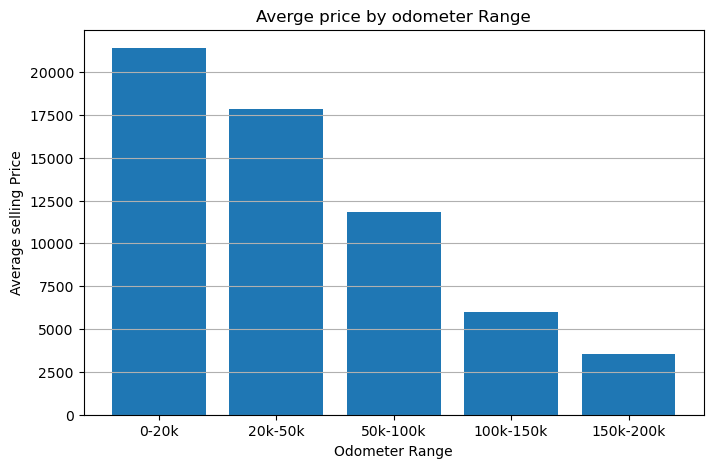

The analysis shows a strong negative relationship between odometer range and average selling price, indicating that mileage is a key factor in car pricing


In [16]:
plt.figure(figsize=(8,5))
plt.bar(
    odometer_range_for_price["odometer_range"],
    odometer_range_for_price["sellingprice"]
    
)
plt.title("Averge price by odometer Range")
plt.xlabel("Odometer Range")
plt.ylabel("Average selling Price")
plt.grid(axis="y")
plt.show()
print("The analysis shows a strong negative relationship between odometer range and average selling price, indicating that mileage is a key factor in car pricing")

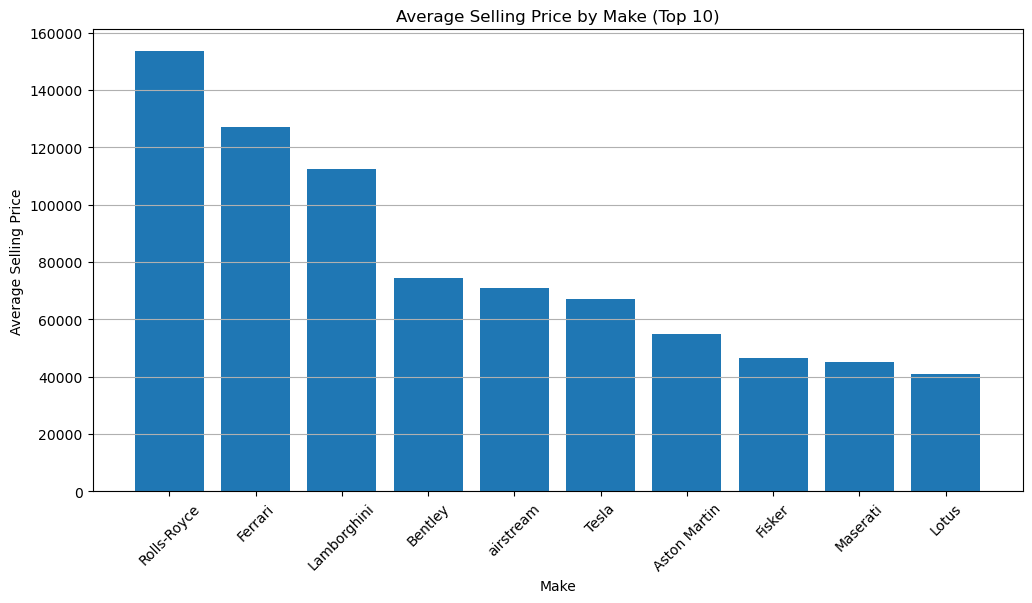

Average car prices vary noticeably by brand, highlighting the strong impact of brand reputation and market positioning on vehicle pricing.


In [17]:
top_10_brands = brand_avg_price.head(10)

plt.figure(figsize=(12,6))
plt.bar(
    top_10_brands["make"],
    top_10_brands["sellingprice"]
)

plt.title("Average Selling Price by Make (Top 10)")
plt.xlabel("Make")
plt.ylabel("Average Selling Price")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()
print("Average car prices vary noticeably by brand, highlighting the strong impact of brand reputation and market positioning on vehicle pricing.")


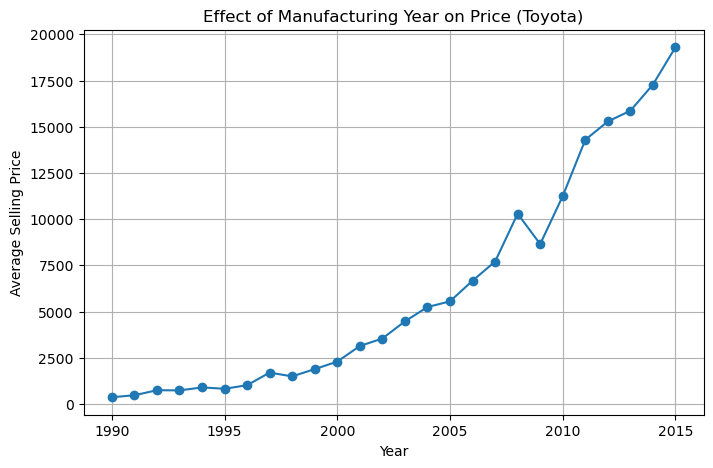

The analysis shows a clear upward trend in average selling price for Toyota vehicles as the manufacturing year becomes more recent, confirming that newer models tend to have higher price


In [18]:
# نثبت ماركة واحدة
toyota_year_price = year_effect_price[
    year_effect_price["make"] == "Toyota"
]

plt.figure(figsize=(8,5))
plt.plot(
    toyota_year_price["year"],
    toyota_year_price["sellingprice"],
    marker="o"
)

plt.title("Effect of Manufacturing Year on Price (Toyota)")
plt.xlabel("Year")
plt.ylabel("Average Selling Price")
plt.grid(True)
plt.show()
print("The analysis shows a clear upward trend in average selling price for Toyota vehicles as the manufacturing year becomes more recent, confirming that newer models tend to have higher price")

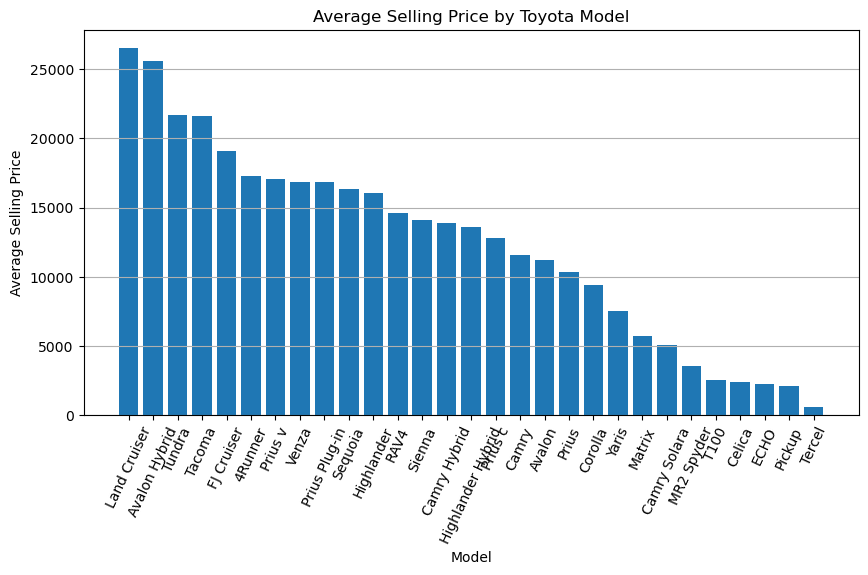

oyota models show noticeable variation in average selling prices, indicating that the model type plays a significant role in determining vehicle value even within the same brand.


In [19]:
plt.figure(figsize=(10,5))

plt.bar(
    toyota_models_price["model"],
    toyota_models_price["sellingprice"]
)

plt.title("Average Selling Price by Toyota Model")
plt.xlabel("Model")
plt.ylabel("Average Selling Price")

plt.xticks(rotation=65)
plt.grid(axis="y")

plt.show()
print("oyota models show noticeable variation in average selling prices, indicating that the model type plays a significant role in determining vehicle value even within the same brand.")

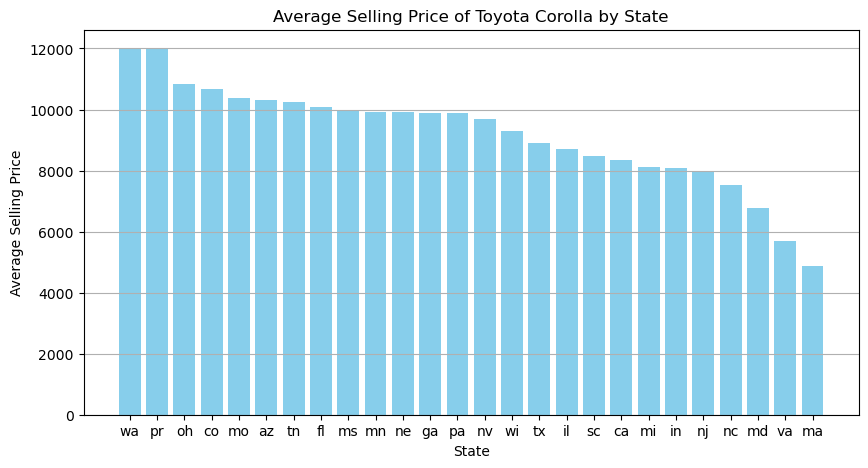

States with higher average prices for Toyota Corolla indicate regional price variation, reflecting demand and market differences across the US.


In [20]:
plt.figure(figsize=(10,5))
plt.bar(
    state_price_corolla_clean["state"],
    state_price_corolla_clean["avg_price"],
    color="skyblue"
)
plt.title("Average Selling Price of Toyota Corolla by State")
plt.xlabel("State")
plt.ylabel("Average Selling Price")
plt.grid(axis="y")
plt.show()
print("States with higher average prices for Toyota Corolla indicate regional price variation, reflecting demand and market differences across the US.")

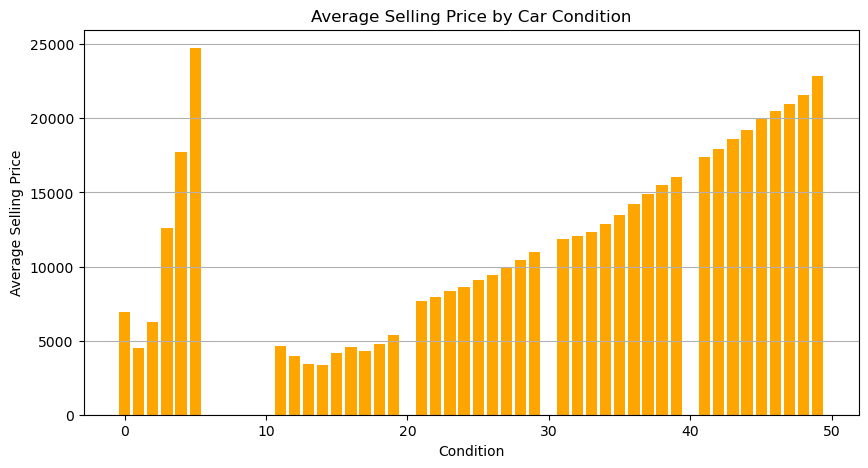

In [21]:
plt.figure(figsize=(10,5))
plt.bar(
    condition_for_car["condition"],
    condition_for_car["sellingprice"],
    color="orange"
    
    
)

plt.title("Average Selling Price by Car Condition")
plt.xlabel("Condition")
plt.ylabel("Average Selling Price")
plt.grid(axis="y")
plt.show()

In [22]:
latest_year = df_filtered["year"].max()
last_10_years = latest_year - 9
df_last_10_years = df_filtered[
    df_filtered["year"] >= last_10_years
]
top_selling_cars = (
    df_last_10_years
    .groupby(["make", "model"])
    .size()
    .reset_index(name="sales_count")
    .sort_values(by="sales_count", ascending=False)
)
top_selling_cars.head(10)


,make,model,sales_count
450,Nissan,Altima,17933
205,Ford,Fusion,12924
194,Ford,F-150,12385
188,Ford,Escape,11159
543,Toyota,Camry,10702
201,Ford,Focus,9729
278,Infiniti,G Sedan,7417
162,Dodge,Grand Caravan,7388
117,Chevrolet,Impala,7046
40,BMW,3 Series,6971


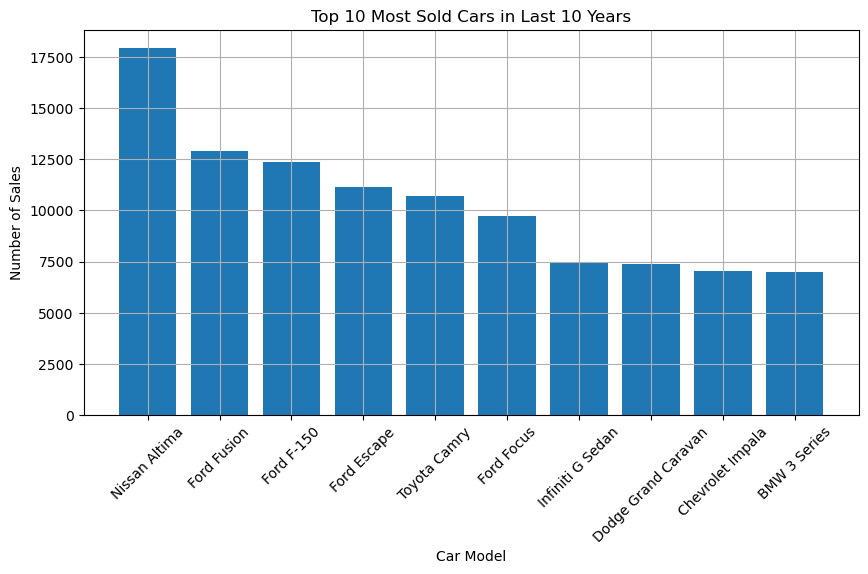

In [23]:
top_10 = top_selling_cars.head(10)

plt.figure(figsize=(10,5))
plt.bar(
    top_10["make"] + " " + top_10["model"],
    top_10["sales_count"]
)
plt.xticks(rotation=45)
plt.title("Top 10 Most Sold Cars in Last 10 Years")
plt.xlabel("Car Model")
plt.ylabel("Number of Sales")
plt.grid(True)
plt.show()


In [24]:
seller_car_sales = (
    df_filtered
    .groupby(["seller", "make", "model"])
    .size()
    .reset_index(name="sales_count")
)
top_car_per_seller = (
    seller_car_sales
    .sort_values(["seller", "sales_count"], ascending=[True, False])
    .groupby("seller")
    .head(1)
    .reset_index(drop=True)
)
top_car_per_seller.head(10)



,seller,make,model,sales_count
0,1 cochran of monroeville,Hyundai,Elantra,6
1,1 for all auto sales,Honda,Fit,1
2,101motors,BMW,5 Series,1
3,1360250 alberta ltd,Ford,F-150,1
4,1360250 alberta ltd.,Honda,Civic,1
5,1428879 alberta ltd,Ford,F-150,1
6,143 auto sales inc,Ford,Ranger,2
7,1479582 alberta ltd.,Cadillac,CTS,1
8,1491081 alberta inc.,Ford,F-150,2
9,1582529 alberta ltd,Toyota,Corolla,1


In [25]:
state_car_sales = (
    df_filtered
    .groupby(["state", "make", "model"])
    .size()
    .reset_index(name="sales_count")
)
top_10_cars_each_state = (
    state_car_sales
    .sort_values(["state", "sales_count"], ascending=[True, False])
    .groupby("state")
    .head(10)
    .reset_index(drop=True)
)
top_10_cars_each_state.head(20)


,state,make,model,sales_count
0,ab,Ford,F-150,149
1,ab,Ford,Escape,35
2,ab,GMC,Sierra 1500,32
3,ab,Jeep,Grand Cherokee,31
4,ab,Dodge,Grand Caravan,29
5,ab,Chrysler,300,20
6,ab,Ram,1500,20
7,ab,Chrysler,200,15
8,ab,Dodge,Journey,15
9,ab,Dodge,Charger,12


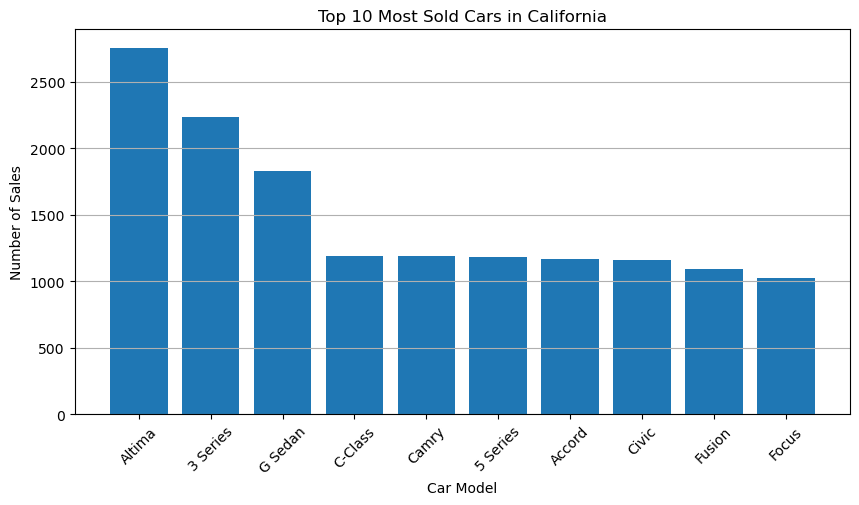

The analysis shows that car preferences vary significantly by state, with certain models dominating sales in specific regions, reflecting local demand and usage patterns


In [33]:
ca_top_10 = top_10_cars_each_state[
    top_10_cars_each_state["state"].str.upper() == "CA"
]

plt.figure(figsize=(10,5))
plt.bar(
    ca_top_10["model"],
    ca_top_10["sales_count"]
)

plt.xticks(rotation=45)
plt.title("Top 10 Most Sold Cars in California")
plt.xlabel("Car Model")
plt.ylabel("Number of Sales")
plt.grid(axis="y")
plt.show()
print("The analysis shows that car preferences vary significantly by state, with certain models dominating sales in specific regions, reflecting local demand and usage patterns")


In [30]:
idx = state_model_stats_clean.groupby("state")["avg_price"].idxmin()

cheapest_fair_car_each_state = (
    state_model_stats_clean
    .loc[idx]
    .sort_values(by="avg_price")
)

cheapest_fair_car_each_state.head(10)


,state,make,model,avg_price,sales_count
5740,md,Saturn,S-Series,534.523810,21
2508,fl,Saturn,S-Series,737.804878,41
1278,ca,Saturn,S-Series,900.500000,50
13601,tx,Dodge,Neon,904.000000,25
8025,nc,Saturn,S-Series,1009.615385,26
10421,oh,Chevrolet,Blazer,1032.758621,29
11928,pa,Pontiac,Grand Am,1260.000000,25
3196,ga,Pontiac,Grand Am,1269.047619,21
5905,mi,Cadillac,DeVille,1566.666667,21
14482,va,Cadillac,DeVille,1574.137931,29


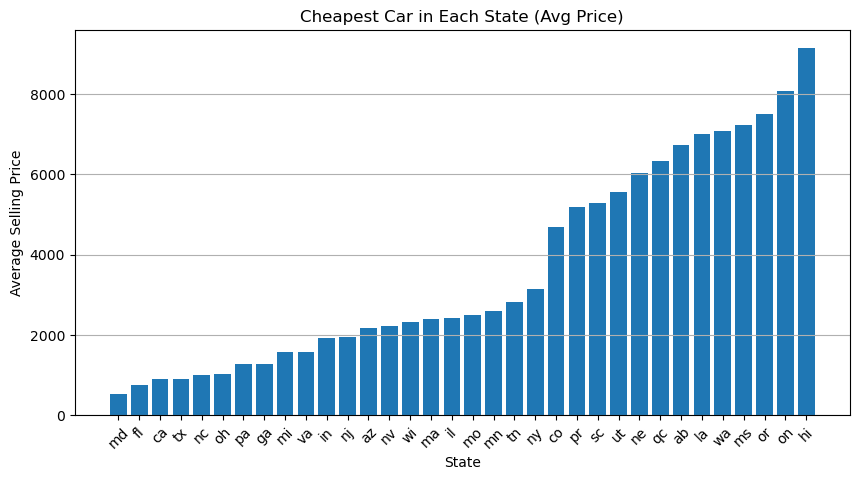

The analysis identifies the cheapest car model in each state based on averag price, ensuring reliability by considering only models with sufficient sales volume. This reduces the impact of outliers and reflects realistic market trend


In [32]:
plt.figure(figsize=(10,5))
plt.bar(
    cheapest_fair_car_each_state["state"],
    cheapest_fair_car_each_state["avg_price"]
)

plt.title("Cheapest Car in Each State (Avg Price)")
plt.xlabel("State")
plt.ylabel("Average Selling Price")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()
print("The analysis identifies the cheapest car model in each state based on averag price, ensuring reliability by considering only models with sufficient sales volume. This reduces the impact of outliers and reflects realistic market trend")